<a href="https://colab.research.google.com/github/WaneeSilaprapat/BMW/blob/main/bmw_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scipy pulp ortools
!pip install pulp
!pip install ortools
!pip install h5py
!pip install pyflowchart

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.6 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.26.1 which is incom

In [ ]:
import numpy as np
import pandas as pd
import pulp as pl
import matplotlib.pyplot as plt
import h5py
import os
import inspect
import pyflowchart
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm


In [ ]:
# --- Parameters ---
num_employees = {"Head": 1, "Buyer": 4, "SupplierQuality": 5}
office_size = 200  # in sqm
exchange_rate = {"Thailand": 0.025, "Singapore": 0.7}
inflation_rate = {"Thailand": 0.05, "Singapore": 0.02}
energy_cost = {"Thailand": 1.1, "Singapore": 0.9}
tax_rate = {"Thailand": 0.20, "Singapore": 0.17}
setup_cost = {"Thailand": 50000, "Singapore": 75000}
transportation_cost = {"Thailand": 2000, "Singapore": 500}
regulatory_cost = {"Thailand": 10000, "Singapore": 15000}
base_revenue = 1000000  # Base revenue in EUR
revenue_growth_factor = 0.02  # Growth factor for revenue

# Define salary_per_employee as a global variable
salary_per_employee = {
    "Thailand": {"Head": 35000, "Buyer": 20000, "SupplierQuality": 20000},
    "Singapore": {"Head": 60000, "Buyer": 40000, "SupplierQuality": 40000}
}



# --- Cost Calculation with Variable Parameters ---
def calculate_costs(country, rent_per_sqm=None, transportation_cost=None, exchange_rate=None, inflation_rate=None, energy_cost=None, tax_rate=None, salary_per_employee=None, setup_cost=None):
    if rent_per_sqm is None:
        rent_per_sqm = {"Thailand": 500, "Singapore": 1000}
    if transportation_cost is None:
        transportation_cost = {"Thailand": 200, "Singapore": 500}
    if exchange_rate is None:
        exchange_rate = {"Thailand": 0.025, "Singapore": 0.7}
    if inflation_rate is None:
        inflation_rate = {"Thailand": 0.05, "Singapore": 0.02}
    if energy_cost is None:
        energy_cost = {"Thailand": 1.1, "Singapore": 0.9}
    if tax_rate is None:
        tax_rate = {"Thailand": 0.20, "Singapore": 0.17}
    if salary_per_employee is None:
        salary_per_employee = {"Thailand": {"Head": 35000, "Buyer": 25000, "SupplierQuality": 30000},
                               "Singapore": {"Head": 60000, "Buyer": 40000, "SupplierQuality": 50000}}
    if setup_cost is None:
        setup_cost = {"Thailand": 50000, "Singapore": 75000}

    salary_cost = sum(salary_per_employee[country][role] * num_employees[role] for role in num_employees)
    rent_cost = rent_per_sqm[country] * office_size

    # Include setup cost in the total cost calculation if provided
    total_cost = (salary_cost + rent_cost + transportation_cost[country] + setup_cost[country]) * (1 + tax_rate[country]) * (1 + inflation_rate[country])

    return total_cost



# --- Scenario Analysis ---
def scenario_analysis():
    scenarios = {
        "Base Case": {
            "inflation_rate": {"Thailand": 0.05, "Singapore": 0.02},
            "salary_per_employee": {
                "Thailand": {"Head": 35000, "Buyer": 20000, "SupplierQuality": 20000},
                "Singapore": {"Head": 60000, "Buyer": 40000, "SupplierQuality": 40000}
            },
            "setup_cost": {"Thailand": 50000, "Singapore": 75000}
        },
        "High Inflation": {
            "inflation_rate": {"Thailand": 0.09, "Singapore": 0.04},  # เพิ่มขึ้นตามสถานการณ์ High Inflation
            "salary_per_employee": {
                "Thailand": {"Head": 35000, "Buyer": 20000, "SupplierQuality": 20000},
                "Singapore": {"Head": 60000, "Buyer": 40000, "SupplierQuality": 40000}
            },
            "setup_cost": {"Thailand": 50000, "Singapore": 75000}
        },
        "Labor Cost Surge": {
            "inflation_rate": {"Thailand": 0.05, "Singapore": 0.02},
            "salary_per_employee": {
                "Thailand": {"Head": 40250, "Buyer": 23000, "SupplierQuality": 23000},  # ปรับเพิ่มตามค่าแรงที่สูงขึ้น
                "Singapore": {"Head": 63000, "Buyer": 42000, "SupplierQuality": 42000}
            },
            "setup_cost": {"Thailand": 50000, "Singapore": 75000}
        },
        "Strong Revenue Growth": {
            "inflation_rate": {"Thailand": 0.05, "Singapore": 0.02},
            "salary_per_employee": {
                "Thailand": {"Head": 35000, "Buyer": 20000, "SupplierQuality": 20000},
                "Singapore": {"Head": 60000, "Buyer": 40000, "SupplierQuality": 40000}
            },
            "setup_cost": {"Thailand": 50000, "Singapore": 75000}
        },
        "Economic Downturn": {  # เพิ่มสถานการณ์ Economic Downturn
            "inflation_rate": {"Thailand": 0.07, "Singapore": 0.03},  # ลดอัตราเงินเฟ้อในประเทศไทย
            "salary_per_employee": {
                "Thailand": {"Head": 33500, "Buyer": 19500, "SupplierQuality": 19500},  # ลดค่าจ้างในสถานการณ์นี้
                "Singapore": {"Head": 58000, "Buyer": 38000, "SupplierQuality": 38000}
            },
            "setup_cost": {"Thailand": 50000, "Singapore": 75000}
        },
        "Increased Operational Costs": {  # เพิ่มสถานการณ์ Increased Operational Costs
            "inflation_rate": {"Thailand": 0.06, "Singapore": 0.025},
            "salary_per_employee": {
                "Thailand": {"Head": 36000, "Buyer": 20500, "SupplierQuality": 20500},
                "Singapore": {"Head": 61000, "Buyer": 41000, "SupplierQuality": 41000}
            },
            "setup_cost": {"Thailand": 55000, "Singapore": 80000}  # เพิ่มค่าตั้งต้นสำหรับสถานการณ์นี้
        }
    }

    results = {}
    for scenario, params in scenarios.items():
        thailand_cost = calculate_costs("Thailand", inflation_rate=params["inflation_rate"], salary_per_employee=params["salary_per_employee"], setup_cost=params["setup_cost"])
        singapore_cost = calculate_costs("Singapore", inflation_rate=params["inflation_rate"], salary_per_employee=params["salary_per_employee"], setup_cost=params["setup_cost"])
        results[scenario] = {
            "Thailand": thailand_cost,
            "Singapore": singapore_cost
        }

    return pd.DataFrame(results)





# Call the function and print the output
scenario_df = scenario_analysis()
print(scenario_df)

# --- Monte Carlo Simulation ---
def monte_carlo_simulation(base_value, risk_factor, num_simulations=1000):
    results = []
    for _ in range(num_simulations):
        fluctuation = np.random.uniform(-risk_factor, risk_factor)
        simulated_value = base_value * (1 + fluctuation)
        results.append(simulated_value)
    return np.mean(results), np.std(results)

# --- Monte Carlo Simulation for Costs ---
def calculate_costs_with_uncertainty(country, risk_factor=0.1):
    base_cost = calculate_costs(country)
    mean_cost, std_cost = monte_carlo_simulation(base_cost, risk_factor)
    return mean_cost, std_cost

# --- Optimization Model using PuLP ---
def optimization_model():
    model = pl.LpProblem("BMW_Optimization", pl.LpMinimize)

    # Decision Variables
    z = pl.LpVariable("Location", cat="Binary")  # 1 if Thailand, 0 if Singapore

    # Costs with uncertainty
    thailand_mean_cost, thailand_std_cost = calculate_costs_with_uncertainty("Thailand")
    singapore_mean_cost, singapore_std_cost = calculate_costs_with_uncertainty("Singapore")

    # Objective Function
    model += z * thailand_mean_cost + (1 - z) * singapore_mean_cost, "Total_Cost"

    # Budget Constraint
    model += (z * thailand_mean_cost + (1 - z) * singapore_mean_cost) <= 2000000, "Budget"

    # Solve the model
    model.solve()

    if pl.LpStatus[model.status] == 'Optimal':
        optimal_location = 'Thailand' if z.varValue == 1 else 'Singapore'
        total_cost = pl.value(model.objective)
        print(f"Optimal Location: {optimal_location}")
        print(f"Total Cost: {total_cost:.2f} EUR")
    else:
        print("No Optimal Solution Found")

    # Save the model
    model.writeLP("optimization_model.lp")

    # Save the results to HDF5 file
    with h5py.File("optimization_results.h5", "w") as hf:
        hf.create_dataset("location", data=int(z.varValue))  # Store as integer (1 for Thailand, 0 for Singapore)
        hf.create_dataset("total_cost", data=pl.value(model.objective))

    return model

# Execute the optimization model
model = optimization_model()

# Define your initial costs
rent_costs = 200000
transportation_costs = 50000
labor_costs = 100000
overhead_costs = 30000
supplier_travel_costs = 50000

# Function to calculate total costs
def calculate_costs(country, rent_costs, transportation_costs, labor_costs, overhead_costs, supplier_travel_costs):
    total_cost = rent_costs + transportation_costs + labor_costs + overhead_costs + supplier_travel_costs
    return total_cost

# Function to calculate total costs
def calculate_costs(rent_costs, transportation_costs, labor_costs, overhead_costs, supplier_travel_costs):
    total_cost = rent_costs + transportation_costs + labor_costs + overhead_costs + supplier_travel_costs
    return total_cost


# Sensitivity Analysis Function
def sensitivity_analysis():
    sensitivity_results = {}

    # Parameters to analyze
    parameters = {
        "Rent Costs": rent_costs,
        "Transportation Costs": transportation_costs,
        "Labor Costs": labor_costs,
        "Overhead Costs": overhead_costs,
        "Supplier Travel Costs": supplier_travel_costs,
    }

    # Conducting sensitivity analysis for each parameter
    for param_name, base_value in parameters.items():
        for change in [-0.1, 0.1]:  # -10% and +10%
            new_value = base_value * (1 + change)

            # Prepare all cost parameters
            new_costs = {
                "Thailand": calculate_costs(
                    rent_costs if param_name != "Rent Costs" else new_value,
                    transportation_costs if param_name != "Transportation Costs" else new_value,
                    labor_costs if param_name != "Labor Costs" else new_value,
                    overhead_costs if param_name != "Overhead Costs" else new_value,
                    supplier_travel_costs if param_name != "Supplier Travel Costs" else new_value
                ),
                "Singapore": calculate_costs(
                    rent_costs if param_name != "Rent Costs" else new_value,
                    transportation_costs if param_name != "Transportation Costs" else new_value,
                    labor_costs if param_name != "Labor Costs" else new_value,
                    overhead_costs if param_name != "Overhead Costs" else new_value,
                    supplier_travel_costs if param_name != "Supplier Travel Costs" else new_value
                )
            }
            sensitivity_results[f'{param_name} ({change*100:+}%)'] = new_costs

    return pd.DataFrame(sensitivity_results)


# Execute Sensitivity Analysis
sensitivity_results = sensitivity_analysis()
print("\nSensitivity Analysis Results:")
print(sensitivity_results)



# Assuming you have a function that calculates the optimal costs for Thailand and Singapore
def get_historical_costs():
    # Get the optimal costs from your existing calculations (replace with actual function calls)
    historical_costs_thailand = [calculate_costs("Thailand") for _ in range(5)]  # Previous 5 years
    return historical_costs_thailand

# --- Cost Forecasting using Regression ---
def cost_forecasting():
    # Get historical costs from your calculations
    # Use the correct calculate_costs function with all necessary arguments
    historical_costs = [calculate_costs(rent_costs, transportation_costs, labor_costs, overhead_costs, supplier_travel_costs) for _ in range(5)]  # Previous 5 years

    # Prepare the data for regression
    years = list(range(1, len(historical_costs) + 1))
    historical_data = {
        'Year': years,
        'Costs': historical_costs
    }

    # Convert to DataFrame
    df = pd.DataFrame(historical_data)

    # Fit the regression model
    X = df['Year']
    y = df['Costs']

    # Adding a constant for the intercept
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    # Predict costs for the next 5 years
    future_years = pd.DataFrame({'Year': [len(historical_costs) + i for i in range(1, 6)]})
    future_years = sm.add_constant(future_years)

    predictions = model.predict(future_years)

    return predictions

# Get historical costs using the correct function and parameters
def get_historical_costs():
    # Get the optimal costs from your existing calculations (replace with actual function calls)
    # Using the second definition of calculate_costs
    historical_costs_thailand = [calculate_costs(rent_costs, transportation_costs, labor_costs, overhead_costs, supplier_travel_costs) for _ in range(5)]  # Previous 5 years
    return historical_costs_thailand

# Execute the cost forecasting and print predictions
predicted_costs = cost_forecasting()
print("Predicted Costs for the next 5 years:", predicted_costs.values)




# Summary of Sensitivity Analysis
def summarize_sensitivity_analysis(sensitivity_results):
    impact_summary = {}
    for column in sensitivity_results.columns:
        impact_summary[column] = sensitivity_results[column].max() - sensitivity_results[column].min()

    most_impactful_param = max(impact_summary, key=impact_summary.get)
    highest_impact_value = impact_summary[most_impactful_param]

    print("\nSummary of Sensitivity Analysis:")
    print(f"The parameter with the highest impact is '{most_impactful_param}' with an impact value of {highest_impact_value:.2f} EUR.")

# Summarize the sensitivity analysis results
summarize_sensitivity_analysis(sensitivity_results)




           Base Case  High Inflation  Labor Cost Surge  Strong Revenue Growth  \
Thailand    460152.0        477681.6          500787.0               460152.0   
Singapore   830009.7        846284.4          855071.1               830009.7   

           Economic Downturn  Increased Operational Costs  
Thailand           461212.80                   477890.400  
Singapore          814045.05                   852067.125  
Optimal Location: Thailand
Total Cost: 547317.91 EUR

Sensitivity Analysis Results:
           Rent Costs (-10.0%)  Rent Costs (+10.0%)  \
Thailand              410000.0             450000.0   
Singapore             410000.0             450000.0   

           Transportation Costs (-10.0%)  Transportation Costs (+10.0%)  \
Thailand                        425000.0                       435000.0   
Singapore                       425000.0                       435000.0   

           Labor Costs (-10.0%)  Labor Costs (+10.0%)  \
Thailand               420000.0            

In [ ]:
# --- Monte Carlo Simulation for Costs ---
3def calculate_costs_with_uncertainty(country, risk_factor=0.1):
    base_cost = calculate_costs(country)
    mean_cost, std_cost = monte_carlo_simulation(base_cost, risk_factor)
    return mean_cost, std_cost

# --- Optimization Model using PuLP ---
def optimization_model():
    model = pl.LpProblem("BMW_Optimization", pl.LpMinimize)

    # Decision Variables
    z = pl.LpVariable("Location", cat="Binary")  # 1 if Thailand, 0 if Singapore

    # Costs with uncertainty
    thailand_mean_cost, thailand_std_cost = calculate_costs_with_uncertainty("Thailand")
    singapore_mean_cost, singapore_std_cost = calculate_costs_with_uncertainty("Singapore")

    # Objective Function
    model += z * thailand_mean_cost + (1 - z) * singapore_mean_cost, "Total_Cost"

    # Budget Constraint
    model += (z * thailand_mean_cost + (1 - z) * singapore_mean_cost) <= 2000000, "Budget"

    # Solve the model
    model.solve()

    if pl.LpStatus[model.status] == 'Optimal':
        optimal_location = 'Thailand' if z.varValue == 1 else 'Singapore'
        total_cost = pl.value(model.objective)
        print(f"Optimal Location: {optimal_location}")
        print(f"Total Cost: {total_cost:.2f} EUR")
    else:
        print("No Optimal Solution Found")

    # Save the model
    model.writeLP("optimization_model.lp")

    # Save the results to HDF5 file
    with h5py.File("optimization_results.h5", "w") as hf:
        hf.create_dataset("location", data=int(z.varValue))  # Store as integer (1 for Thailand, 0 for Singapore)
        hf.create_dataset("total_cost", data=pl.value(model.objective))

    return model

In [ ]:
import pulp as pl

# --- Optimization Model for Employee Count and Cost ---
def optimization_model_with_employee_count():
    model = pl.LpProblem("BMW_Optimization", pl.LpMinimize)

    # Decision Variables
    z_thailand = pl.LpVariable("Thailand", cat="Binary")  # 1 if Thailand is chosen, 0 otherwise
    z_singapore = pl.LpVariable("Singapore", cat="Binary")  # 1 if Singapore is chosen, 0 otherwise
    num_head = pl.LpVariable("Num_Head", lowBound=1, upBound=2, cat="Integer")  # Constraint: 1 <= head <= 2
    num_buyer = pl.LpVariable("Num_Buyer", lowBound=2, upBound=4, cat="Integer")  # Constraint: 1 <= Buyer <= 4
    num_supplier_quality = pl.LpVariable("Num_SupplierQuality", lowBound=2, upBound=5, cat="Integer")  # Constraint: 1 <= Supplier Quality <= 5

    # Ensure that only one location can be chosen
    model += z_thailand + z_singapore == 1, "OneLocationConstraint"

    # Costs for Thailand and Singapore (use actual or example values)
    thailand_mean_cost = 50000  # Example fixed cost for Thailand
    singapore_mean_cost = 60000  # Example fixed cost for Singapore

    # Define salary_per_employee as a global variable with equal salaries for both countries
    salary_per_employee = {
    "Thailand": {"Head": 40000, "Buyer": 25000, "SupplierQuality": 25000},
    "Singapore": {"Head": 40000, "Buyer": 25000, "SupplierQuality": 25000}
    }

    salary_thailand = salary_per_employee["Thailand"]
    salary_singapore = salary_per_employee["Singapore"]

    # Big M value (large enough to exceed any possible cost)
    M = 1000000

    # Auxiliary variables for total costs in each location
    total_cost_thailand = pl.LpVariable("Total_Cost_Thailand", lowBound=0)
    total_cost_singapore = pl.LpVariable("Total_Cost_Singapore", lowBound=0)

    # Constraints for total cost calculations (Big M method)
    model += total_cost_thailand >= (num_head * salary_thailand["Head"] +
                                     num_buyer * salary_thailand["Buyer"] +
                                     num_supplier_quality * salary_thailand["SupplierQuality"] +
                                     thailand_mean_cost) - (1 - z_thailand) * M
    model += total_cost_thailand <= (num_head * salary_thailand["Head"] +
                                     num_buyer * salary_thailand["Buyer"] +
                                     num_supplier_quality * salary_thailand["SupplierQuality"] +
                                     thailand_mean_cost) + (1 - z_thailand) * M

    model += total_cost_singapore >= (num_head * salary_singapore["Head"] +
                                      num_buyer * salary_singapore["Buyer"] +
                                      num_supplier_quality * salary_singapore["SupplierQuality"] +
                                      singapore_mean_cost) - (1 - z_singapore) * M
    model += total_cost_singapore <= (num_head * salary_singapore["Head"] +
                                      num_buyer * salary_singapore["Buyer"] +
                                      num_supplier_quality * salary_singapore["SupplierQuality"] +
                                      singapore_mean_cost) + (1 - z_singapore) * M

    # Objective Function (minimize total cost based on location)
    model += total_cost_thailand + total_cost_singapore, "Total_Cost"

    # Budget Constraint
    model += total_cost_thailand + total_cost_singapore <= 2000000, "Budget"

    # ตัวอย่างการเพิ่มเป้าหมายในการเพิ่มประสิทธิภาพการทำงาน
    model += num_head + num_buyer + num_supplier_quality, "MaximizeEmployeeCount"


    # Solve the model
    model.solve()

    if pl.LpStatus[model.status] == 'Optimal':
        optimal_location = 'Thailand' if z_thailand.varValue == 1 else 'Singapore'
        total_cost_value = pl.value(model.objective)
        optimal_head_count = num_head.varValue
        optimal_buyer_count = num_buyer.varValue
        optimal_supplier_quality_count = num_supplier_quality.varValue

        print(f"Optimal Location: {optimal_location}")
        print(f"Total Cost: {total_cost_value:.2f} EUR")
        print(f"Optimal Head Count: {optimal_head_count}")
        print(f"Optimal Buyer Count: {optimal_buyer_count}")
        print(f"Optimal Supplier Quality Count: {optimal_supplier_quality_count}")
    else:
        print("No Optimal Solution Found")

    return model

# Execute the updated optimization model
optimization_model_with_employee_count()


Optimal Location: Thailand
Total Cost: 5.00 EUR
Optimal Head Count: 1.0
Optimal Buyer Count: 2.0
Optimal Supplier Quality Count: 2.0


/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1650: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


BMW_Optimization:
MINIMIZE
1*Num_Buyer + 1*Num_Head + 1*Num_SupplierQuality + 0
SUBJECT TO
OneLocationConstraint: Singapore + Thailand = 1

_C1: - 25000 Num_Buyer - 40000 Num_Head - 25000 Num_SupplierQuality
 - 1000000 Thailand + Total_Cost_Thailand >= -950000

_C2: - 25000 Num_Buyer - 40000 Num_Head - 25000 Num_SupplierQuality
 + 1000000 Thailand + Total_Cost_Thailand <= 1050000

_C3: - 25000 Num_Buyer - 40000 Num_Head - 25000 Num_SupplierQuality
 - 1000000 Singapore + Total_Cost_Singapore >= -940000

_C4: - 25000 Num_Buyer - 40000 Num_Head - 25000 Num_SupplierQuality
 + 1000000 Singapore + Total_Cost_Singapore <= 1060000

Budget: Total_Cost_Singapore + Total_Cost_Thailand <= 2000000

VARIABLES
2 <= Num_Buyer <= 4 Integer
1 <= Num_Head <= 2 Integer
2 <= Num_SupplierQuality <= 5 Integer
0 <= Singapore <= 1 Integer
0 <= Thailand <= 1 Integer
Total_Cost_Singapore Continuous
Total_Cost_Thailand Continuous

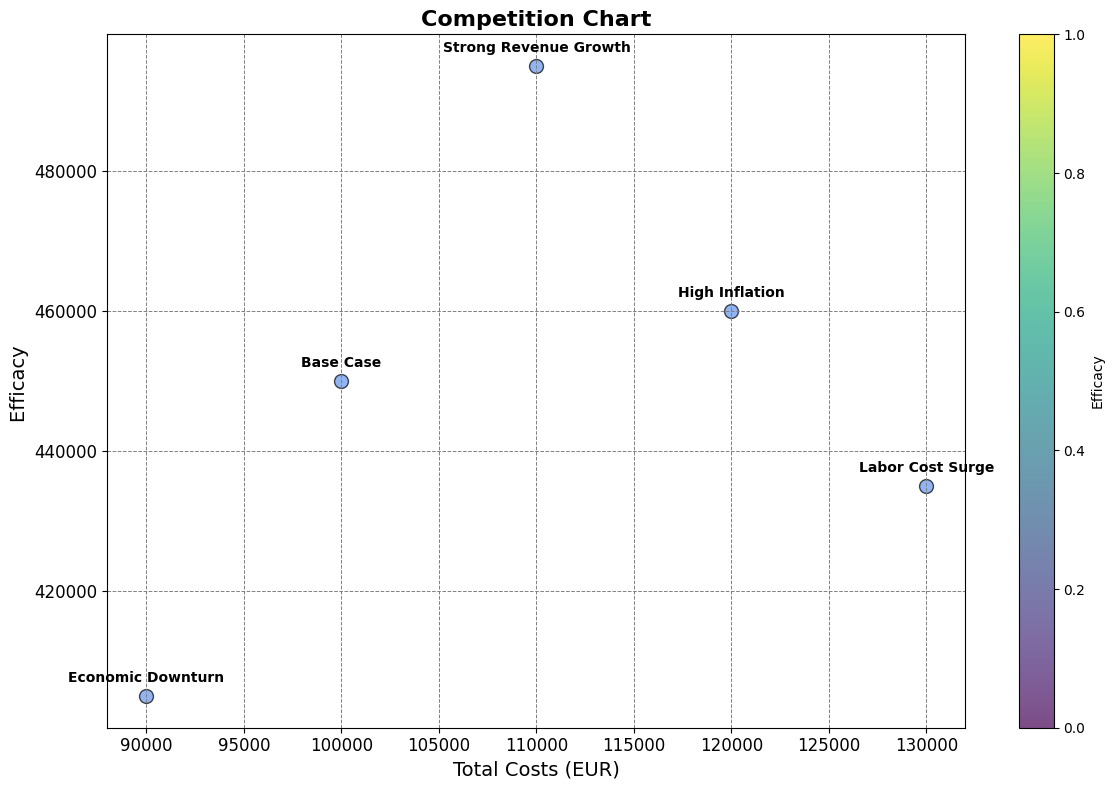

In [ ]:
# --- Visualization ---
# Data for the Competition Chart
scenarios = [
    "Base Case",
    "High Inflation",
    "Labor Cost Surge",
    "Strong Revenue Growth",
    "Economic Downturn"
]

total_costs = [100000, 120000, 130000, 110000, 90000]  # Total Costs in EUR
profits = [900000, 900000, 870000, 940000, 860000]  # Profit in EUR
revenue_growth_rates = [0, 2, 0, 5, -5]  # Revenue Growth Rate in %

# Calculate Efficacy (Average of Profit and Revenue Growth Rate)
efficacy = [(profit + revenue_growth_rate * 10000) / 2 for profit, revenue_growth_rate in zip(profits, revenue_growth_rates)]

# Create the Competition Chart
plt.figure(figsize=(12, 8))
scatter = plt.scatter(total_costs, efficacy, color='cornflowerblue', s=100, edgecolors='black', alpha=0.7)

# Annotate the points with scenario names
for i, scenario in enumerate(scenarios):
    plt.annotate(scenario, (total_costs[i], efficacy[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, fontweight='bold')

# Add titles and labels
plt.title('Competition Chart', fontsize=16, fontweight='bold')
plt.xlabel('Total Costs (EUR)', fontsize=14)
plt.ylabel('Efficacy ', fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a color bar for context
plt.colorbar(scatter, label='Efficacy')

# Show the plot
plt.tight_layout()
plt.show()






In [ ]:
def summarize_sensitivity_analysis(sensitivity_results):
    impact_summary = {}

    # Analyzing the results to find the highest impact parameters
    for column in sensitivity_results.columns:
        impact_summary[column] = sensitivity_results[column].max() - sensitivity_results[column].min()

    # Finding the parameter with the highest impact
    most_impactful_param = max(impact_summary, key=impact_summary.get)
    highest_impact_value = impact_summary[most_impactful_param]

    print("\nSummary of Sensitivity Analysis:")
    print(f"The parameter with the highest impact is '{most_impactful_param}' with an impact value of {highest_impact_value:.2f} EUR.")

# Summarize the sensitivity analysis results
summarize_sensitivity_analysis(sensitivity_results)



Summary of Sensitivity Analysis:
The parameter with the highest impact is 'Rent Costs (-10.0%)' with an impact value of 0.00 EUR.


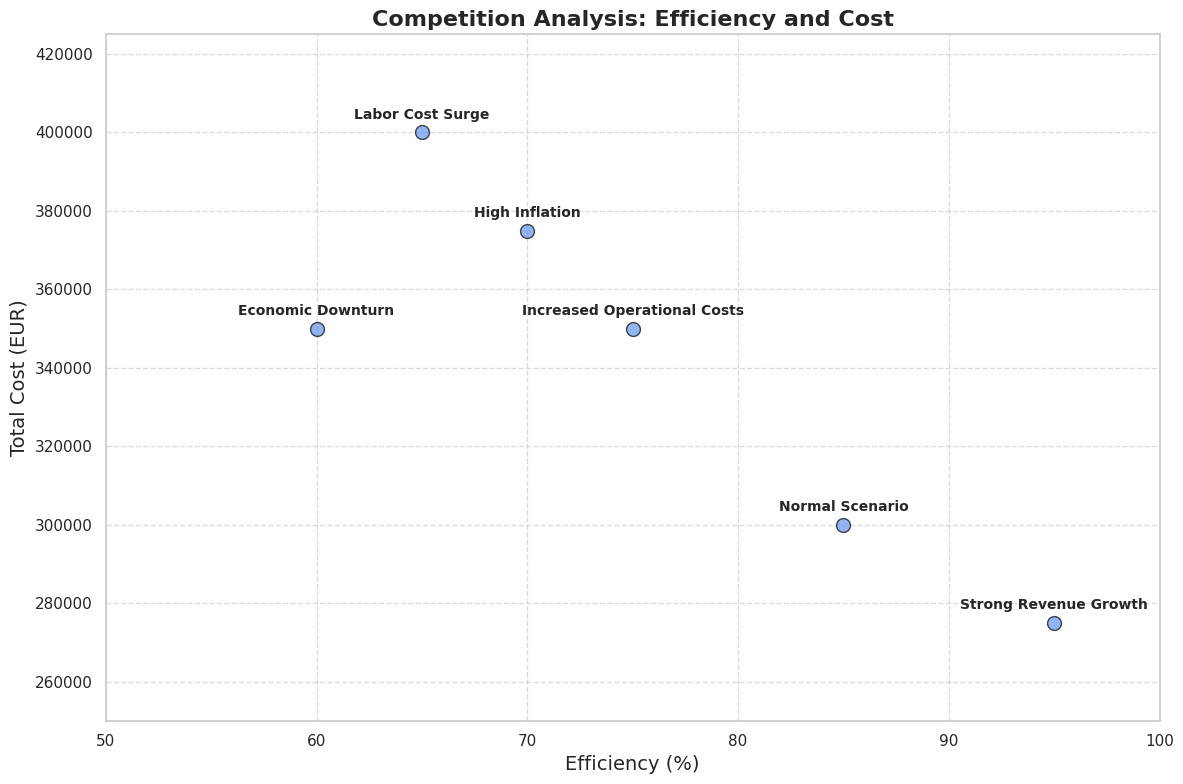

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ข้อมูลของ Scenario Analysis
scenarios = [
    "Normal Scenario",
    "Economic Downturn",
    "High Inflation",
    "Labor Cost Surge",
    "Strong Revenue Growth",
    "Increased Operational Costs"
]

# ข้อมูล Efficiency และ Cost ตาม Scenario
efficiency = [85, 60, 70, 65, 95, 75]  # Efficiency (X)
cost = [300000, 350000, 375000, 400000, 275000, 350000]  # Cost (Y)

# ตั้งค่าธีมของ Seaborn
sns.set(style="whitegrid")

# สร้าง Scatter Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(efficiency, cost, color='cornflowerblue', s=100, edgecolor='black', alpha=0.7)

# ใส่ชื่อ Scenario บนจุดของกราฟ
for i, scenario in enumerate(scenarios):
    plt.annotate(scenario, (efficiency[i], cost[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, fontweight='bold')

# ตั้งชื่อแกน X และ Y
plt.title('Competition Analysis: Efficiency and Cost', fontsize=16, fontweight='bold')
plt.xlabel('Efficiency (%)', fontsize=14)
plt.ylabel('Total Cost (EUR)', fontsize=14)

# ตั้งค่าเส้นกริด
plt.grid(True, linestyle='--', alpha=0.7)

# ตั้งช่วงค่าแกน X และ Y
plt.xlim(50, 100)
plt.ylim(250000, 425000)

# แสดงกราฟ
plt.tight_layout()
plt.show()


<ipython-input-8-62f7286ebeb6>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=scenario_df, ci=None)


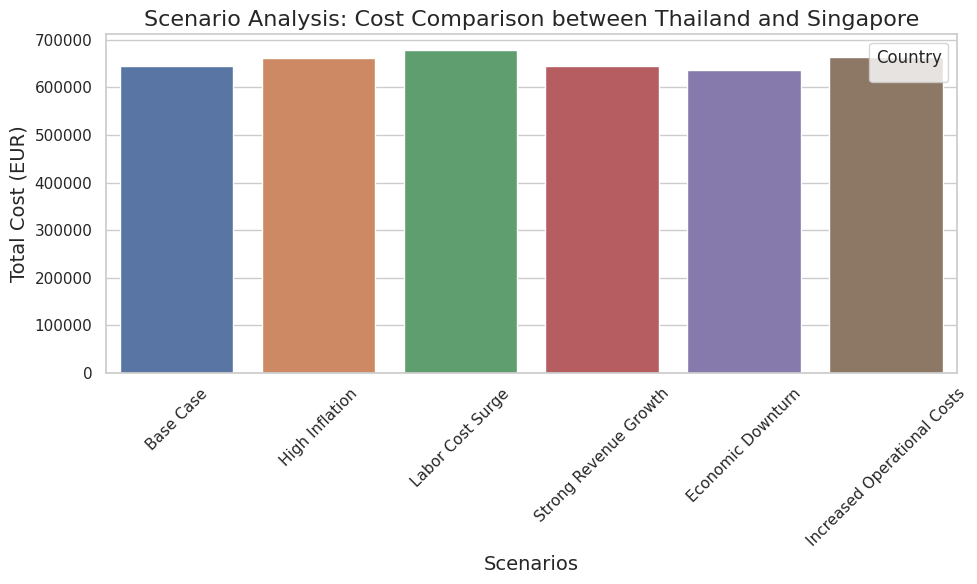

<ipython-input-8-62f7286ebeb6>:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sensitivity_results, ci=None)


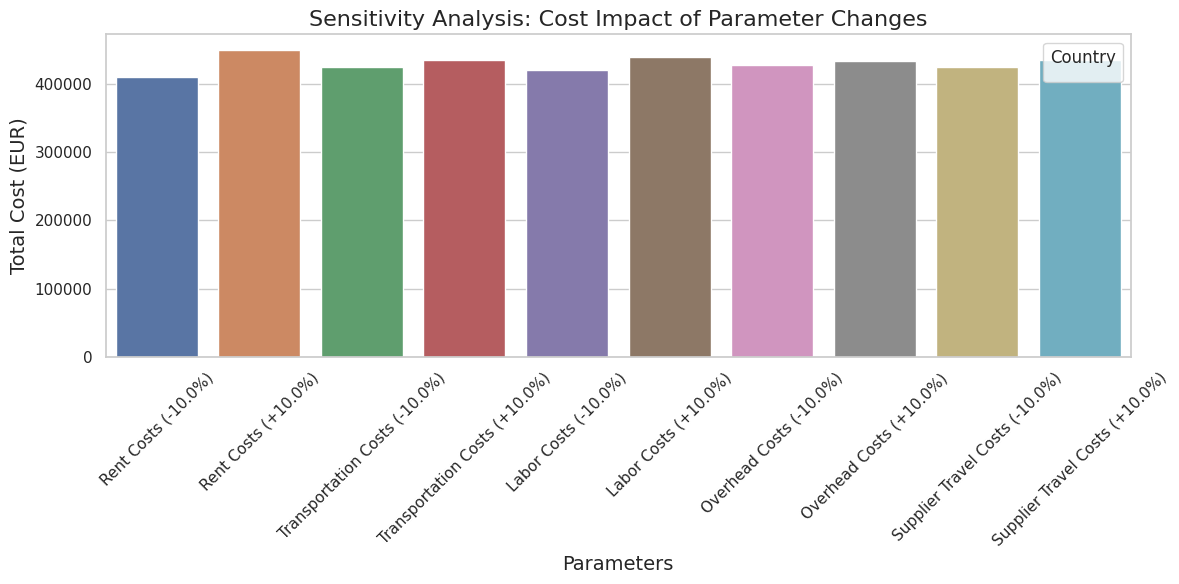

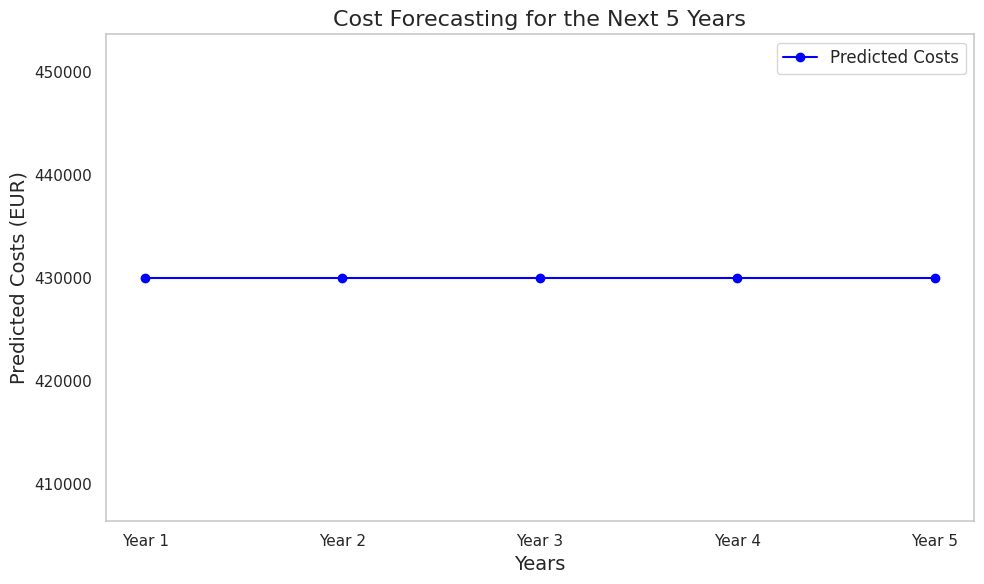

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure that the plots appear inline
%matplotlib inline

# Set seaborn style
sns.set(style="whitegrid")

# 1. Visualization of Scenario Analysis Results
def plot_scenario_analysis(scenario_df):
    plt.figure(figsize=(10, 6))
    # ใช้ seaborn เพื่อสร้างกราฟ bar plot
    sns.barplot(data=scenario_df, ci=None)
    plt.title('Scenario Analysis: Cost Comparison between Thailand and Singapore', fontsize=16)
    plt.xlabel('Scenarios', fontsize=14)
    plt.ylabel('Total Cost (EUR)', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Country', fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function to plot scenario analysis
plot_scenario_analysis(scenario_df)

# 2. Visualization of Sensitivity Analysis Results
def plot_sensitivity_analysis(sensitivity_results):
    plt.figure(figsize=(12, 6))
    # ใช้ seaborn เพื่อสร้างกราฟ bar plot
    sns.barplot(data=sensitivity_results, ci=None)
    plt.title('Sensitivity Analysis: Cost Impact of Parameter Changes', fontsize=16)
    plt.xlabel('Parameters', fontsize=14)
    plt.ylabel('Total Cost (EUR)', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Country', fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function to plot sensitivity analysis
plot_sensitivity_analysis(sensitivity_results)

# 3. Visualization of Cost Forecasting Results
def plot_cost_forecasting(predicted_costs):
    years = list(range(len(predicted_costs)))
    plt.figure(figsize=(10, 6))
    plt.plot(years, predicted_costs, marker='o', color='blue', label='Predicted Costs')
    plt.title('Cost Forecasting for the Next 5 Years', fontsize=16)
    plt.xlabel('Years', fontsize=14)
    plt.ylabel('Predicted Costs (EUR)', fontsize=14)
    plt.xticks(years, [f'Year {i+1}' for i in years])
    plt.grid()
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function to plot cost forecasting
plot_cost_forecasting(predicted_costs)


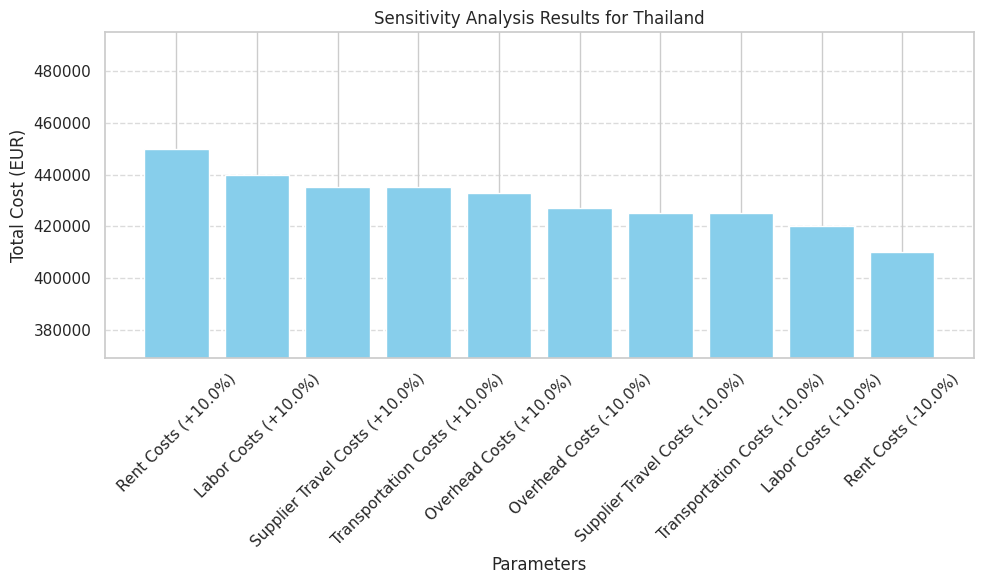

In [ ]:
import matplotlib.pyplot as plt

# สมมติว่า 'Thailand' คือดัชนีของแถว และไม่ใช่ชื่อคอลัมน์
# เข้าถึงข้อมูลของ Thailand โดยใช้ .loc[]
thailand_results = sensitivity_results.loc["Thailand"]

# รวบรวมค่าที่มี parameter เหมือนกัน
thailand_grouped = thailand_results.groupby(thailand_results.index).sum()  # รวมค่าที่มีชื่อ parameter เหมือนกัน

# จัดเรียงค่าจากมากไปน้อย
thailand_sorted = thailand_grouped.sort_values(ascending=False)

# สร้างชื่อสำหรับแกน X
parameter_names = thailand_sorted.index  # ชื่อ parameter หลังจากจัดเรียงและรวม

# สร้างกราฟ
plt.figure(figsize=(10, 6))
plt.bar(parameter_names, thailand_sorted.values, color='skyblue')  # ใช้ .values ในการเข้าถึงข้อมูลที่รวมและเรียง
plt.title('Sensitivity Analysis Results for Thailand')
plt.xlabel('Parameters')
plt.ylabel('Total Cost (EUR)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ปรับช่วงค่าแกน Y เพื่อให้เห็นความแตกต่างชัดเจนขึ้น
y_min = min(thailand_sorted.values) * 0.9  # ลดช่วงค่าลงเล็กน้อยเพื่อความสวยงาม
y_max = max(thailand_sorted.values) * 1.1  # เพิ่มขอบเขตเพื่อความชัดเจน
plt.ylim(y_min, y_max)

plt.tight_layout()

# แสดงกราฟ
plt.show()
